### Combining datasets in Pandas

Combining datasets in Pandas is a core skill for data analysis. 

Pandas provides several flexible and powerful functions to combine, merge, and concatenate datasets based on different needs.

#### Common Ways to Combine Datasets
1. Concatenation `(pd.concat)`
Used to stack DataFrames either vertically (rows) or horizontally (columns).

`Stack Rows (same columns)`



In [3]:
import pandas as pd

In [25]:
df1 = pd.DataFrame({'ID': [1, 2], 'Name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'ID': [3, 4], 'Name': ['Carol', 'David']})

result = pd.concat([df1, df2])

In [26]:
result

,ID,Name
0,1,Alice
1,2,Bob
0,3,Carol
1,4,David


`Stack Columns (same rows)`

In [27]:
df1 = pd.DataFrame({'ID': [1, 2], 'Name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'ID': [3, 4], 'Name': ['Carol', 'David']})

result = pd.concat([df1, df2], axis=1)
result

,ID,Name,ID,Name
0,1,Alice,3,Carol
1,2,Bob,4,David


2. Merging `(pd.merge)`

Similar to SQL joins. You merge on key columns.

syntax 
```python 
pd.merge(left, right, on=None, how='inner')
```

| Part    | Meaning                                                    |
| ------- | ---------------------------------------------------------- |
| `left`  | The first DataFrame (e.g., `df1`)                          |
| `right` | The second DataFrame (e.g., `df2`)                         |
| `on`    | Column name(s) to join on (must exist in both DataFrames)  |
| `how`   | Type of join: `'inner'`, `'left'`, `'right'`, or `'outer'` |

#### Join Types

| `how=` value | Description                                                                       |
| ------------ | --------------------------------------------------------------------------------- |
| `'inner'`    | Returns rows with matching keys in both DataFrames (default)                      |
| `'left'`     | All rows from the left DataFrame + matching rows from the right (NaN if no match) |
| `'right'`    | All rows from the right DataFrame + matching rows from the left (NaN if no match) |
| `'outer'`    | All rows from both DataFrames, fill missing with NaN                              |

Example Scenario: Customers and Orders

Dataset 1: Customers (df_customers)

In [28]:
df_customers = pd.DataFrame({
    'CustomerID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Country': ['Kenya', 'Uganda', 'Kenya']
})
df_customers

,CustomerID,Name,Country
0,1,Alice,Kenya
1,2,Bob,Uganda
2,3,Charlie,Kenya


 Dataset 2: Orders (df_orders)

In [29]:
df_orders = pd.DataFrame({
    'OrderID': [101, 102, 103, 104],
    'CustomerID': [2, 1, 2, 4],
    'Amount': [250, 150, 300, 500]
})
df_orders

,OrderID,CustomerID,Amount
0,101,2,250
1,102,1,150
2,103,2,300
3,104,4,500


 1. Inner Join – Only customers who have orders

In [30]:
pd.merge(df_customers, df_orders, on='CustomerID', how='inner')

,CustomerID,Name,Country,OrderID,Amount
0,1,Alice,Kenya,102,150
1,2,Bob,Uganda,101,250
2,2,Bob,Uganda,103,300


2. Left Join – All customers, even if they didn’t order

In [31]:
pd.merge(df_customers, df_orders, on='CustomerID', how='left')

,CustomerID,Name,Country,OrderID,Amount
0,1,Alice,Kenya,102.0,150.0
1,2,Bob,Uganda,101.0,250.0
2,2,Bob,Uganda,103.0,300.0
3,3,Charlie,Kenya,NaN,NaN


3. Right Join – All orders, even if customer not found

In [32]:
pd.merge(df_customers, df_orders, on='CustomerID', how='right')

,CustomerID,Name,Country,OrderID,Amount
0,2,Bob,Uganda,101,250
1,1,Alice,Kenya,102,150
2,2,Bob,Uganda,103,300
3,4,NaN,NaN,104,500


4. Outer Join – All customers and all orders

In [33]:
pd.merge(df_customers, df_orders, on='CustomerID', how='outer')

,CustomerID,Name,Country,OrderID,Amount
0,1,Alice,Kenya,102.0,150.0
1,2,Bob,Uganda,101.0,250.0
2,2,Bob,Uganda,103.0,300.0
3,3,Charlie,Kenya,NaN,NaN
4,4,NaN,NaN,104.0,500.0


### Joins

In Pandas, `.join()` is another way to combine datasets, similar to merge(), but with a slightly different use case and syntax.

It is best used when joining on the index or when you want a simpler syntax for merging by key.

Syntax
```python 
df1.join(df2, how='left', on=None)
```

- `df1` is the left DataFrame.
- `df2` is the right DataFrame.
- `on` specifies the column to join on (if not index).
- `how` can be 'left', 'right', 'inner', 'outer'.

Join on Index

In [34]:

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=[1, 2, 3])
df1

,Name,Age
1,Alice,25
2,Bob,30
3,Charlie,35


In [35]:
df2 = pd.DataFrame({
    'Salary': [50000, 60000, 70000]
}, index=[1, 2, 3])
df2

,Salary
1,50000
2,60000
3,70000


In [36]:
result = df1.join(df2)
result  

,Name,Age,Salary
1,Alice,25,50000
2,Bob,30,60000
3,Charlie,35,70000


Join on Column Instead of Index


In [37]:
df1 = pd.DataFrame({
    'CustomerID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df1

,CustomerID,Name
0,1,Alice
1,2,Bob
2,3,Charlie


In [38]:
df2 = pd.DataFrame({
    'CustomerID': [1, 2],
    'Salary': [50000, 60000]
})
df2

,CustomerID,Salary
0,1,50000
1,2,60000


In [39]:
df1 = df1.set_index('CustomerID')
df1

,Name
CustomerID,
1,Alice
2,Bob
3,Charlie


In [40]:
df2 = df2.set_index('CustomerID')
df2

,Salary
CustomerID,
1,50000
2,60000


In [41]:
result = df1.join(df2, how='left')
result

,Name,Salary
CustomerID,,
1,Alice,50000.0
2,Bob,60000.0
3,Charlie,NaN


#### When to Use `.join()`:
- When joining on the index.
- When you want a simpler syntax than merge() for small tasks.
- When doing one-to-one or one-to-many joins.

### Pandas String Operations

In previous sections, we saw how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

- This `vectorization` of operations simplifies the syntax of operating on arrays of data:
- For arrays of strings, NumPy does not provide such simple access, and thus you’re stuck using a loop syntax: 

In [47]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

`.capitalize()` method:

- Converts the first character of the string to uppercase
- Converts the rest of the characters to lowercase

This is perhaps sufficient to work with some data, but it will break if there are any missing values. For example:

In [48]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for `vectorized string` operations and for correctly handling missing data via the `str` attribute of Pandas Series and Index objects containing strings. 

So, for example, suppose we create a Pandas Series with this data:

In [49]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [ ]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### Tables of Pandas String Methods

In [50]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [ ]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

Notice that these have various return values. Some, like lower(), return a series of strings:

But some others return numbers:

In [ ]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Or Boolean values:

In [ ]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Still others return lists or other compound values for each element:

In [ ]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods similar to Python string methods

Nearly all Python’s built-in string methods are mirrored by a Pandas vectorized string method.

Here is a list of Pandas `str` methods that mirror Python string methods:

| Python String Method  | Pandas `.str` Method          | Description                                       |
| --------------------- | ----------------------------- | ------------------------------------------------- |
| `s.lower()`           | `series.str.lower()`          | Converts string to lowercase                      |
| `s.upper()`           | `series.str.upper()`          | Converts string to uppercase                      |
| `s.title()`           | `series.str.title()`          | Capitalizes first letter of each word             |
| `s.capitalize()`      | `series.str.capitalize()`     | Capitalizes first letter, rest lowercase          |
| `s.strip()`           | `series.str.strip()`          | Removes leading/trailing whitespace               |
| `s.lstrip()`          | `series.str.lstrip()`         | Removes leading whitespace                        |
| `s.rstrip()`          | `series.str.rstrip()`         | Removes trailing whitespace                       |
| `s.startswith('a')`   | `series.str.startswith('a')`  | Checks if string starts with given substring      |
| `s.endswith('z')`     | `series.str.endswith('z')`    | Checks if string ends with given substring        |
| `'a' in s`            | `series.str.contains('a')`    | Checks if string contains a substring             |
| `s.replace('a', 'b')` | `series.str.replace('a','b')` | Replaces substring with another                   |
| `s.find('a')`         | `series.str.find('a')`        | Finds index of first occurrence (-1 if not found) |
| `s.rfind('a')`        | `series.str.rfind('a')`       | Finds index of last occurrence (-1 if not found)  |
| `s.isalpha()`         | `series.str.isalpha()`        | Checks if all characters are alphabetic           |
| `s.isdigit()`         | `series.str.isdigit()`        | Checks if all characters are digits               |
| `s.isalnum()`         | `series.str.isalnum()`        | Checks if all characters are alphanumeric         |
| `s.isspace()`         | `series.str.isspace()`        | Checks if string contains only whitespace         |
| `s.split()`           | `series.str.split()`          | Splits string by whitespace or delimiter          |
| `' '.join(list)`      | `series.str.join()`           | Joins elements using a string                     |
| `s.zfill(5)`          | `series.str.zfill(5)`         | Pads string on the left with zeros to fill width  |
| `s.pad(width)`        | `series.str.pad(width)`       | Pads string with a specified character            |
| `s.center(width)`     | `series.str.center(width)`    | Centers the string                                |


#### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python’s built-in re module:

#### Pandas str Methods for Pattern Matching (Regex)

| **Method**   | **Description**                                                         |
| ------------ | ----------------------------------------------------------------------- |
| `match()`    | Call `re.match()` on each element, returning a boolean.                 |
| `extract()`  | Call `re.match()` on each element, returning matched groups as strings. |
| `findall()`  | Call `re.findall()` on each element.                                    |
| `replace()`  | Replace occurrences of pattern with some other string.                  |
| `contains()` | Call `re.search()` on each element, returning a boolean.                |
| `count()`    | Count occurrences of pattern.                                           |
| `split()`    | Equivalent to `str.split()`, but accepts regex patterns.                |
| `rsplit()`   | Equivalent to `str.rsplit()`, but accepts regex patterns.               |


With these, you can do a wide range of interesting operations.

For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [51]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [52]:
monte.str.extract('([A-Za-z]+)', expand=True)

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


##### Regex breakdown: '([A-Za-z]+)'
- [A-Za-z] → Match any uppercase or lowercase letter
- `+` → Match one or more letters

So it captures the first group of letters found in each string (ignores numbers, symbols, etc.).

#### Pandas String Manipulation Methods

| **Method**        | **Description**                                                         |
| ----------------- | ----------------------------------------------------------------------- |
| `get()`           | Index each element (like accessing characters: e.g., `str[0]`)          |
| `slice()`         | Slice each element using start/stop/step (like `str[1:4]`)              |
| `slice_replace()` | Replace a slice in each element with the passed value                   |
| `cat()`           | Concatenate strings from multiple Series or with a separator            |
| `repeat()`        | Repeat values (e.g., `'a' * 3` → `'aaa'`)                               |
| `normalize()`     | Return Unicode-normalized form of string (e.g., NFC, NFD)               |
| `pad()`           | Add whitespace (or other character) to left, right, or both sides       |
| `wrap()`          | Wrap long strings into lines of specified width                         |
| `join()`          | Join strings in each element using a passed separator                   |
| `get_dummies()`   | Extract dummy/indicator variables from string categories as a DataFrame |


#### Vectorized item access and slicing
The `get()` and `slice()` operations, in particular, enable vectorized element access from each array.

For example, we can get a slice of the first three characters of each array using `str.slice(0, 3)`.

Note that this behavior is also available through Python’s normal indexing syntax–for example, `df.str.slice(0, 3)` is equivalent to `df.str[0:3]`:

In [53]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [ ]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via `df.str.get(i)` and `df.str[i]` is likewise similar.

These `get()` and `slice()` methods also let you access elements of arrays returned by `split()`.

For example, to extract the last name of each entry, we can combine `split()` and `get()`

In [ ]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables

Another method that requires a bit of extra explanation is the `get_dummies()` method.

This is useful when your data has a column containing some sort of coded indicator.

For example, we might have a dataset that contains information in the form of codes, such as A=”born in America,” B=”born in the United Kingdom,” C=”likes cheese,” D=”likes spam”:

In [ ]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The `get_dummies()` routine lets you quickly split-out these indicator variables into a DataFrame:

In [ ]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Working with Time-Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with `dates`, `times`, and `time-indexed` data

Date and time data comes in a the following formats:

- `Time stamps` reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- `Time intervals` and `periods` reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- `Time deltas` or `durations` reference an exact length of time (e.g., a duration of 22.56 seconds).

We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas. 

### Dates and Times in Python

##### Native Python dates and times: `datetime` and `dateutil`

Python’s basic objects for working with dates and times reside in the built-in `datetime` module.

Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functionalities on dates and times. 

For example, you can manually build a date using the `datetime` type:

In [7]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

using the `dateutil` module, you can parse dates from a variety of string formats

In [8]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

The `.strftime()` method is used to format a datetime object into a string with a specific date format.



In [9]:
date.strftime('%Y-%m-%d')

'2015-07-04'

#### Other Common Format Codes

| Code | Meaning           | Example  |
| ---- | ----------------- | -------- |
| `%H` | Hour (00–23)      | `14`     |
| `%I` | Hour (01–12)      | `02`     |
| `%p` | AM or PM          | `PM`     |
| `%M` | Minute (00–59)    | `05`     |
| `%S` | Second (00–59)    | `09`     |
| `%A` | Full weekday name | `Monday` |
| `%B` | Full month name   | `July`   |

In [12]:
date.strftime('%p')

'AM'

#### Typed arrays of times: NumPy’s datetime64
The weaknesses of Python’s datetime format inspired the NumPy team to add a set of native time series data type to NumPy.

The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [13]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [14]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in `NumPy datetime64` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python’s datetime objects, especially as arrays get large 

#### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a `Timestamp object`, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.

From a group of these `Timestamp objects`, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`; we’ll see many examples of this below.

In [15]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

Additionally, we can do NumPy-style vectorized operations directly on this same object

In [6]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

`pd.to_timedelta(..., 'D')`: Converts each number in np.arange(12) to a time duration in days

#### Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to `index data` by `timestamps`.

For example, we can construct a Series object that has time indexed data:

In [17]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [18]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Pandas Time Series Data Structures
The fundamental Pandas data structures for working with time series data:

- For `time stamps`, Pandas provides the `Timestamp` type. As mentioned before, it is essentially a replacement for Python’s native `datetime`, but is based on the more efficient `numpy.datetime64` data type. The associated Index structure is `DatetimeIndex`.
- For `time Periods`, Pandas provides the `Period` type. This encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index structure is PeriodIndex.
- For `time deltas` or `durations`, Pandas provides the `Timedelta` type. Timedelta is a more efficient replacement for Python’s native `datetime.timedelta` type, and is based on `numpy.timedelta64`. The associated index structure is `TimedeltaIndex`.

The most fundamental of these date/time objects are the `Timestamp` and `DatetimeIndex` objects.

While these class objects can be invoked directly, it is more common to use the `pd.to_datetime()` function, which can parse a wide variety of formats.

Passing a single date to `pd.to_datetime()` yields a `Timestamp`; passing a series of dates by default yields a `DatetimeIndex`:

### Time Series with Superstore Data

#### Load and Explore the Dataset

In [29]:
import pandas as pd

df = pd.read_csv("superstore (1).csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Set Order Date as a DatetimeIndex

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

#### Set Order Date as Index (for Resampling)

In [22]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [33]:
df = df.set_index('Order Date')

In [25]:
df.set_index('Order Date', inplace=True)
df.head()

KeyError: "None of ['Order Date'] are in the columns"

#### Work with Timestamps
A `Timestamp` represents a specific point in time.

In [34]:
df.loc['11/10/2016']

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2016-11-10,266,CA-2016-155040,15/11/2016,Standard Class,AH-10210,Alan Hwang,Consumer,United States,Brentwood,California,94513.0,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,79.900
2016-11-10,5006,CA-2016-158659,14/11/2016,Second Class,SC-20695,Steve Chapman,Corporate,United States,Richmond,Indiana,47374.0,Central,OFF-ST-10003306,Office Supplies,Storage,Letter Size Cart,714.300
2016-11-10,5849,CA-2016-121783,14/11/2016,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113.0,Central,OFF-AP-10003849,Office Supplies,Appliances,Hoover Shoulder Vac Commercial Portable Vacuum,715.640
2016-11-10,5850,CA-2016-121783,14/11/2016,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113.0,Central,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,795.510
2016-11-10,5851,CA-2016-121783,14/11/2016,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113.0,Central,TEC-CO-10001571,Technology,Copiers,Sharp 1540cs Digital Laser Copier,549.990
2016-11-10,5852,CA-2016-121783,14/11/2016,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113.0,Central,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,74.760
2016-11-10,5853,CA-2016-121783,14/11/2016,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113.0,Central,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,29.220
2016-11-10,9552,CA-2016-147690,14/11/2016,Standard Class,SC-20020,Sam Craven,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,577.584


#### Resample Sales by Month and Plot

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Order Date'>

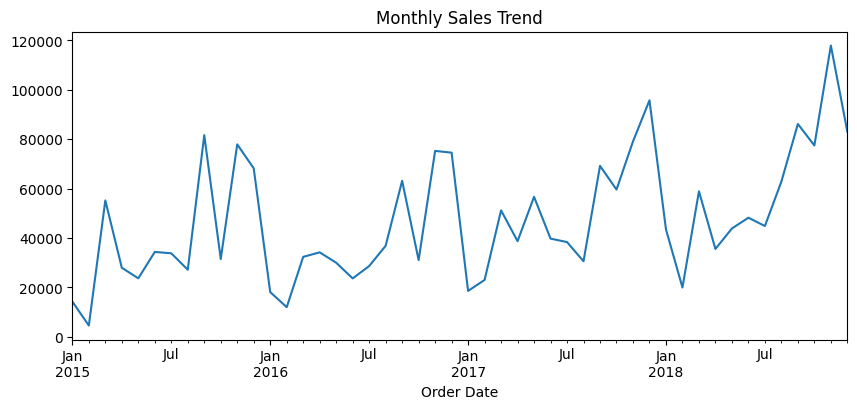

In [35]:
monthly_sales = df['Sales'].resample('ME').sum()
monthly_sales.plot(title="Monthly Sales Trend", figsize=(10,4))

- `resample('M')`: Groups data by month
- You can also try `Q` for quarterly, `Y` for yearly

#### Work with Periods
A `Period` is a span of time (e.g., month or quarter)

<Axes: title={'center': 'Monthly Sales'}, xlabel='Order_Period'>

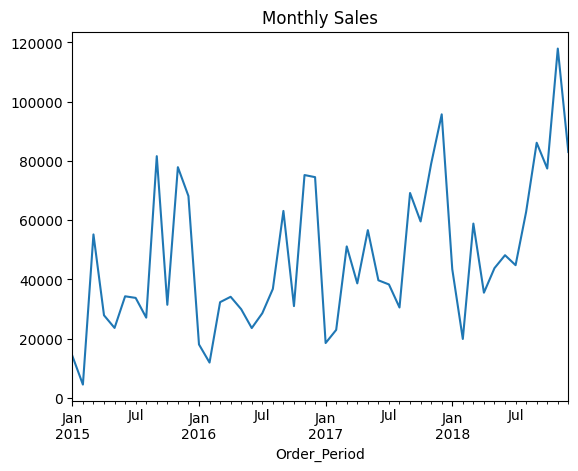

In [ ]:
df['Order_Period'] = df.index.to_period('M')
monthly_sales = df.groupby('Order_Period')['Sales'].sum()
monthly_sales.plot(title="Monthly Sales")

#### Work with Timedeltas (Delivery Time)
A `Timedelta` is the time difference between two dates.

In [36]:
df['Delivery_Days'] = (df['Ship Date'] - df.index).dt.days
print(df[['Ship Date', 'Delivery_Days']].head())

TypeError: cannot subtract DatetimeArray from ndarray

In [33]:
# Create a column from index 
df['Order_Date'] = df.index

In [35]:
# Ensure both columns are datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [36]:
# Compute delivery time
df['Delivery_Days'] = (df['Ship Date'] - df['Order_Date']).dt.days

In [37]:
print(df[['Order_Date', 'Ship Date', 'Delivery_Days']].head())

           Order_Date  Ship Date  Delivery_Days
Order Date                                     
2017-11-08 2017-11-08 2017-11-11              3
2017-11-08 2017-11-08 2017-11-11              3
2017-06-12 2017-06-12 2017-06-16              4
2016-10-11 2016-10-11 2016-10-18              7
2016-10-11 2016-10-11 2016-10-18              7


#### Google Stock Price Data with yfinance

#### Import Libraries

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

##### Download Daily Stock Data

In [ ]:
# Download Google stock data from Jan 1, 2020 to present
goog = yf.download('GOOGL', start='2020-01-01')
goog.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13400\3304151498.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog = yf.download('GOOGL', start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2020-01-02,68.026024,68.026024,66.923141,67.018569,27278000
2020-01-03,67.670158,68.278016,66.964392,66.998193,23408000
2020-01-06,69.473846,69.499192,67.147300,67.178606,46768000
2020-01-07,69.339645,69.756647,69.163206,69.605552,34330000
2020-01-08,69.833183,70.171653,69.216384,69.325228,35314000


In [ ]:
goog.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-07-22,191.339996,191.649994,187.460007,191.500000,44660200
2025-07-23,190.229996,192.529999,189.179993,191.500000,58681900
2025-07-24,192.169998,197.949997,191.000000,197.029999,74881700
2025-07-25,193.179993,194.330002,191.259995,191.979996,39743800
2025-07-28,192.580002,194.050003,190.850006,193.660004,36481050


##### Date Indexing and Filtering

In [ ]:
goog.loc['2022']               # Data for 2022

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-01-03,144.127136,144.981509,142.856255,144.190250,28646000
2022-01-04,143.538635,145.611697,142.859708,144.529185,28400000
2022-01-05,136.953629,143.638042,136.867157,143.559018,54618000
2022-01-06,136.926300,139.105734,135.744393,136.181772,37348000
2022-01-07,136.200165,137.623134,134.957116,137.321931,29760000
...,...,...,...,...,...
2022-12-23,88.698051,89.016143,86.550925,86.590687,23003000
2022-12-27,86.869019,88.409781,86.491287,88.270616,20097300


In [ ]:
goog.loc['2023-03']            # Data for March 2023

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2023-03-01,89.821312,90.487316,89.135423,89.443580,31111200
2023-03-02,91.451530,91.729860,89.055894,89.125484,32204400
2023-03-03,93.091698,93.171223,91.898847,91.928675,35160100
2023-03-06,94.562866,95.397862,93.439606,93.459483,32639300
2023-03-07,93.300453,95.099660,92.972419,94.413779,27835500
2023-03-08,93.688118,95.387923,93.439608,93.558896,34103300
2023-03-09,91.769630,94.960493,91.352136,93.489320,28813500
2023-03-10,90.089706,92.236833,89.861082,91.620527,35941000


In [ ]:
goog.loc['2022-05-10']     # Specific day

Price   Ticker
Close   GOOGL     1.137130e+02
High    GOOGL     1.155570e+02
Low     GOOGL     1.122274e+02
Open    GOOGL     1.148189e+02
Volume  GOOGL     3.990000e+07
Name: 2022-05-10 00:00:00, dtype: float64

##### Resampling

In [ ]:
# Monthly average close price
goog['Close'].resample('M').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_13400\617944570.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goog['Close'].resample('M').mean()


Ticker,GOOGL
Date,
2020-01-31,71.379888
2020-02-29,72.706639
2020-03-31,58.903893
2020-04-30,61.138900
2020-05-31,68.656868
...,...
2025-03-31,165.114110
2025-04-30,154.371215
2025-05-31,164.180766


In [ ]:
# Weekly closing price sum
goog['Close'].resample('W').sum()

Ticker,GOOGL
Date,
2020-01-05,135.696182
2020-01-12,350.235023
2020-01-19,359.817070
2020-01-26,294.085281
2020-02-02,359.144089
...,...
2025-07-06,710.239990
2025-07-13,885.579987
2025-07-20,915.169998
